# Проверка гипотез для увеличения выручки

**Задача проекта**

Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 

**Описание данных**

Данные для первой части

Файл `/datasets/hypothesis.csv`
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.

**Данные для второй части**

Файл `/datasets/orders.csv`
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста


## Приоритизация гипотез.

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

**Задача**

- Применим фреймворк `ICE` для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Применим фреймворк `RICE` для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Укажем, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. 


In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

plt.rcParams["figure.figsize"] = (10, 7)

In [2]:
try:
    data = pd.read_csv('/datasets/hypothesis.csv')
except:
    data = pd.read_csv('hypothesis.csv')

In [3]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
#настроим отображение гипотез в таблице
pd.options.display.max_colwidth = 150

In [5]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
data.columns = data.columns.str.lower() #сделаем написание столбцов строчными буквами

**Применим фреймворк `ICE` для приоритизации гипотез.**

In [7]:
data['ICE'] = round(data['impact'] * data['confidence'] / data['efforts'], 2)
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Применим фреймворк `RICE` для приоритизации гипотез.**

In [8]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts'] 
data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Изменения в приоритизации гипотез при применении `RICE` вместо `ICE`**

Наиболее перспективные гипотезы в первом случае (`ICE`) оказались 8, 0, 7, 6 и 2. 
При подсчёте методом `RICE` лидирующими оказались те же гипотезы, только в другом порядке: 7, 2, 0, 6 и 8.
Гипотеза, которая была на пермов месте, при учитывании охвата пользователей переместилась на последнее место лидирующей пятёрки.

Кроме силы гипотез стоит учитывать еще и то, как много пользваотелей она затронет.
У 8-ой гипотезы очень низкая оценка охвата, в то время как у гипотезы под номером 7 она равна максимальному количеству пользователей. 

Таким образом гипотезы:
- (7) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- (2) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- (0) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

в максимальном приоритете.

## Анализ A/B-теста

Провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

**Задача**

Проанализируем A/B-тест:
1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
4. Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.
5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.
6. Построим точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.
11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.
13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
14. Примем решение по результатам теста и объясните его. Варианты решений: 
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

**Откроем и изучим файлы**

In [9]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')

In [10]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Выполним предобработку данных**

In [13]:
#поменяем тип данных на время
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

**Проверим, есть ли те, кто попали в обе группы**

In [14]:
#список членов группы А
orders_A = orders[orders['group'] == 'A']
list_A = orders_A['visitorId'].unique()

#список членов группы В
orders_B = orders[orders['group'] == 'B']
list_B = orders_B['visitorId'].unique()

#список всех участников
orders_total = orders['visitorId']
list_total = orders_total.unique()

print('Количество пользователей в первой группе:', len(list_A))
print('Количество пользователей во второй группе:', len(list_B))
print('Попавших в обе группы:', len(list_A) + len(list_B) - len(list_total))

Количество пользователей в первой группе: 503
Количество пользователей во второй группе: 586
Попавших в обе группы: 58


In [15]:
#список visitorId, попавших в обе группы
double = []
for i in list_A:
    if i in list_B:
        double.append(i)
len(double)

58

**Удалим тех, кто папол в обе группы**

In [16]:
orders = orders.query("visitorId not in @double")

In [17]:
print('Количество пользователей в первой группе:', len(list_A))
print('Количество пользователей во второй группе:', len(list_B))

Количество пользователей в первой группе: 503
Количество пользователей во второй группе: 586


**Даты проведения теста**

In [18]:
print('Даты проведения теста:')
print(orders['date'].min())
print(orders['date'].max())

Даты проведения теста:
2019-08-01 00:00:00
2019-08-31 00:00:00


**Проверим на пропуски и дубликаты**

In [19]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [20]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [21]:
#дубликаты
print(orders.duplicated().sum(), visitors.duplicated().sum())

0 0


**ЧТО МЫ ИМЕЕМ:**

- мы имеем парный А/В-тест, в нем участвует две группы: А и В;
- тест проводится по данным за август с 1 по 31 2019 года;
- в группе А находится 445 человек, в группе В - 528. Группа В почти на 16% больше руппы А, это довольно большая разница.

In [22]:
# Создайте датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

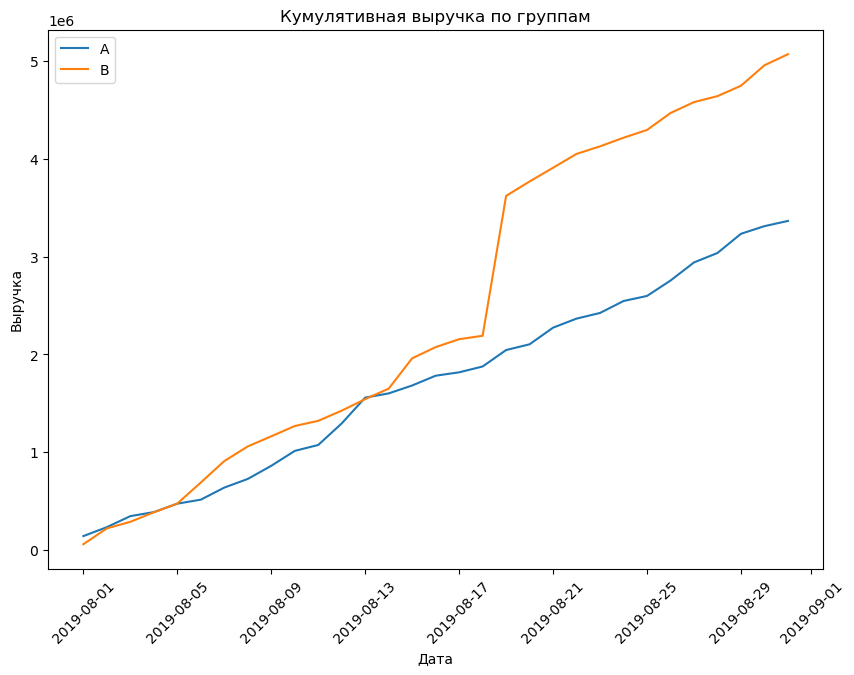

In [23]:
# Строим график кумулятивной выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график кумулятивной выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Вывод**

Выручка увеличивается в течение всего теста. Хороший знак. Выручка сегмента В стабильно выше выручки сегмента А. График выручки группы В в определенной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

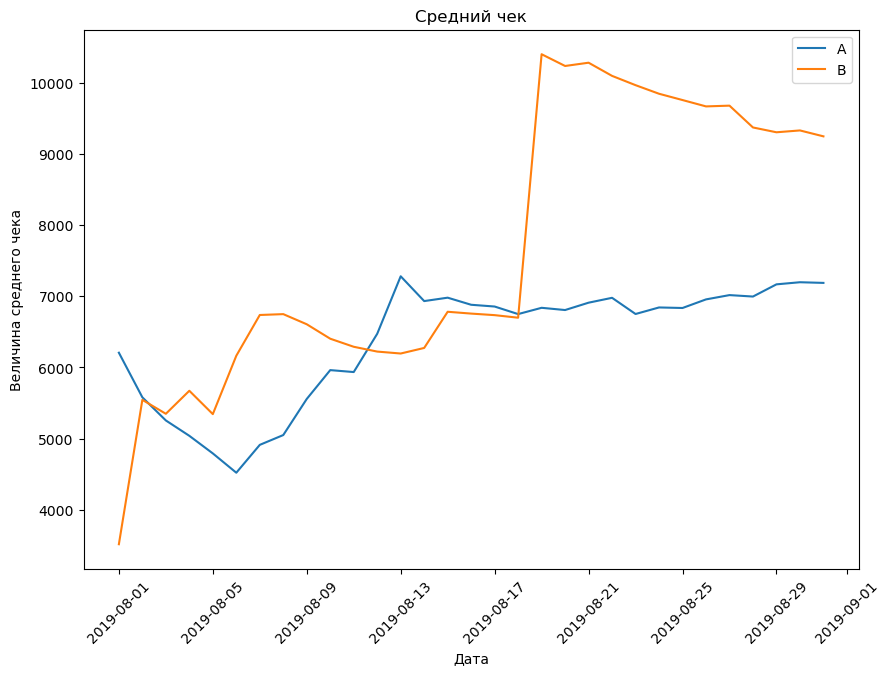

In [24]:
#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('Средний чек')
plt.xlabel('Дата')
plt.ylabel('Величина среднего чека')
plt.xticks(rotation=45)
plt.show()

**Вывод**

Средний чек группы А станвится стабильным к концу теста, в то время как у В он постоянно скачет. В середине теста у В резко увеличился средний чек (скачок наверх на графике), возможно, аномально большие заказы собрались ближе к концу Второй группе нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне... 

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

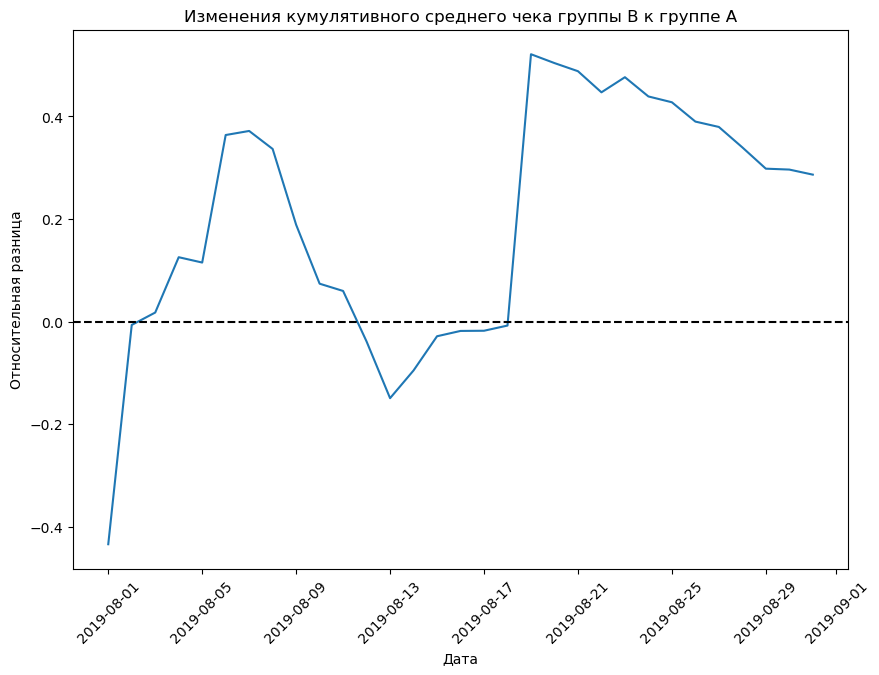

In [25]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/
                                           mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('Изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительная разница')
plt.xticks(rotation=45)
plt.show()

**Вывод**

В среднем чек В выше А, кроме нескольких точек, когда он сравнивается и падает ниже А. Где-то уж точно спрятались крупные заказы и выбросы! 

### Построим график кумулятивного среднего количества заказов на посетителя по группам.

In [26]:
# датафрейм с кумулятивным средним количества заказов на посетителя по дням в группе А
cumulativeOrdersA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'orders', 'visitors']]

# датафрейм с кумулятивным средним количества заказов на посетителя по дням в группе B
cumulativeOrdersB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'orders', 'visitors']]

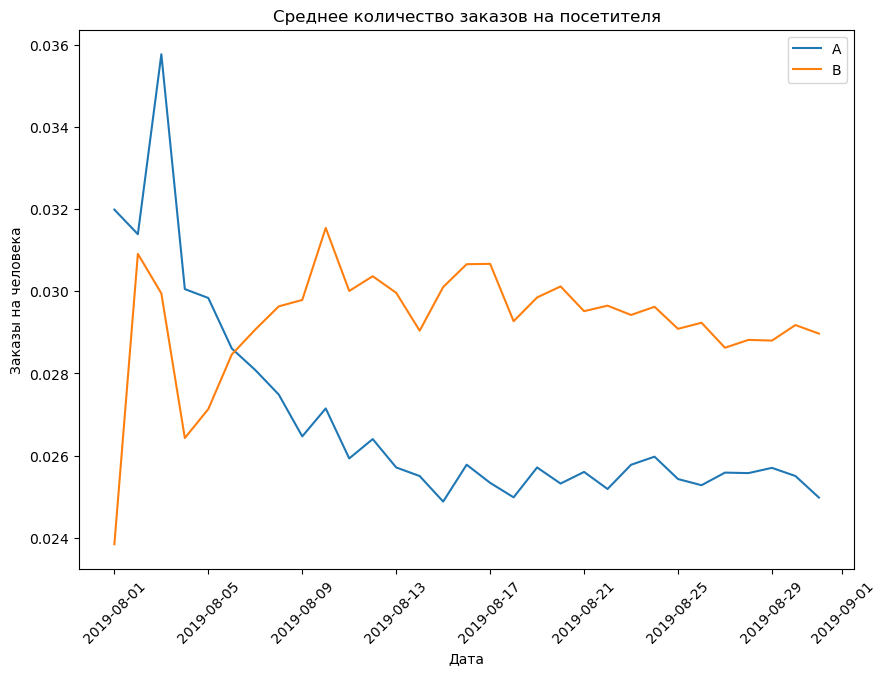

In [27]:
#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeOrdersA['date'], cumulativeOrdersA['orders']/cumulativeOrdersA['visitors'], label='A')
plt.plot(cumulativeOrdersB['date'], cumulativeOrdersB['orders']/cumulativeOrdersB['visitors'], label='B')
plt.legend() 
plt.title('Среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Заказы на человека')
plt.xticks(rotation=45)
plt.show()

**Вывод**

В начале из-за выбросов оба графика взлетают наверх, в потом практически зеркально расходятся: среднее количество заказов сегмента В стабильно выше среднего количества А. При этом оба значения стабилизировались. 

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

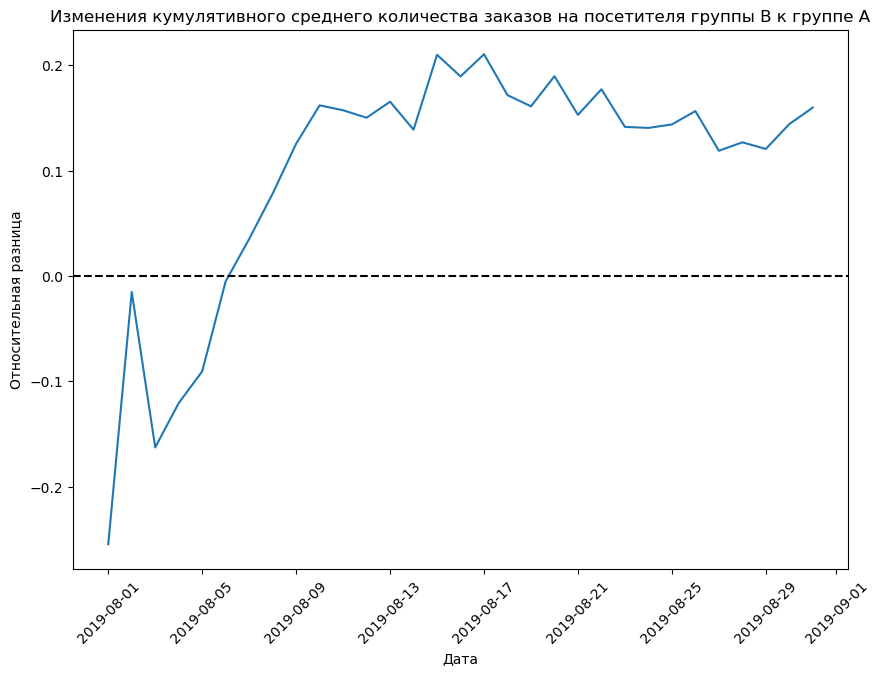

In [28]:
# собираем данные в одном датафрейме
mergedCumulativeOrders = cumulativeOrdersA.merge(cumulativeOrdersB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

# cтроим отношение среднего количества
plt.plot(mergedCumulativeOrders['date'], (mergedCumulativeOrders['ordersB']/
                                           mergedCumulativeOrders['visitorsB'])/
         (mergedCumulativeOrders['ordersA']/mergedCumulativeOrders['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('Изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительная разница')
plt.xticks(rotation=45)
plt.show()

**Вывод**

Сегмент В стабильно выше сегмента А. То есть, среднее количество заказов на посетителя у группы В выше. Но всё еще могут делать свое дело аномалии. Скоро мы сможем это проверить.

### Построим точечный график количества заказов по пользователям. 

In [29]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head()

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


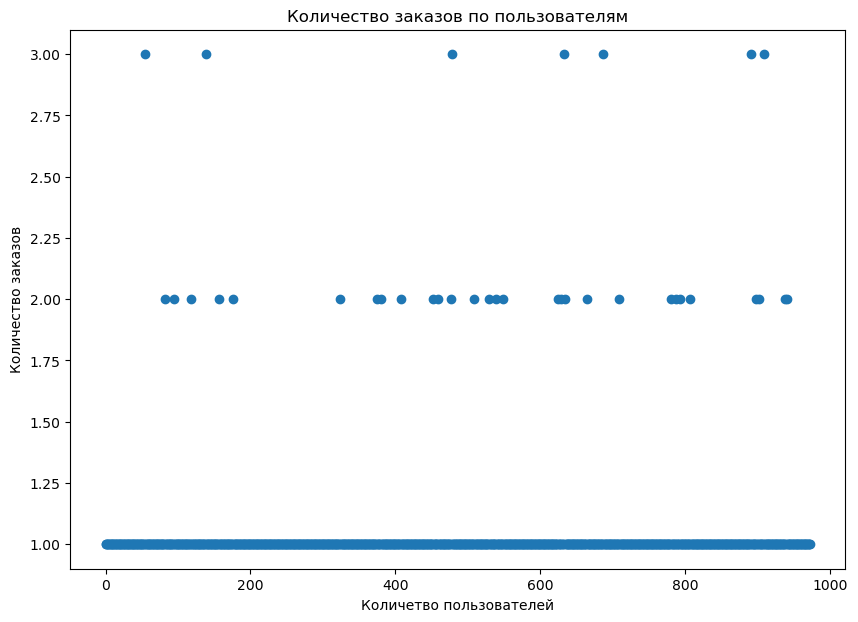

In [30]:
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям')
plt.xlabel('Количетво пользователей')
plt.ylabel('Количество заказов')
plt.show()

**Вывод**

В основном пользователи делали 1-2 заказа, но довольно много и тех, кто делал от 3 до 4.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [31]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

**Вывод**

Не более 5% пользователей оформляли больше 2 заказов. И 1% пользователей заказывали более четырех раз. 
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Построим точечный график стоимостей заказов.

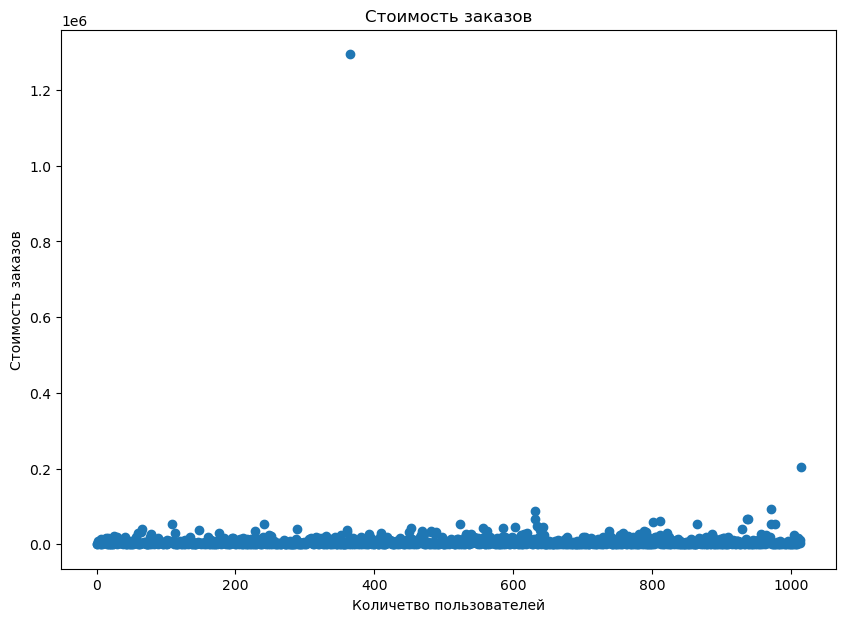

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов')
plt.xlabel('Количетво пользователей')
plt.ylabel('Стоимость заказов')
plt.show()

In [33]:
orders['revenue'].median()

2955.0

**Посмотрим на график без сильных выбросов**

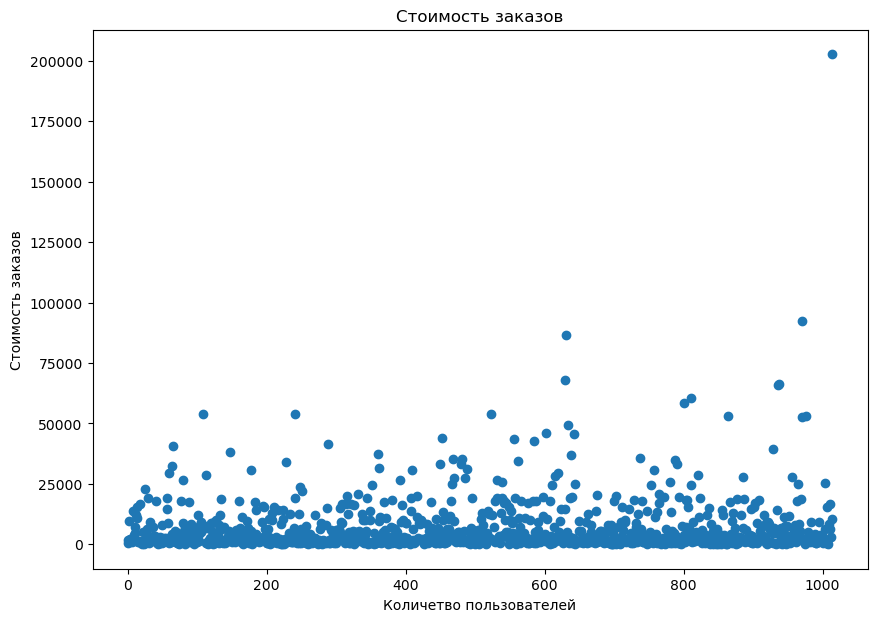

In [34]:
orders_cheap = orders.query('revenue < 400000') #обрезаем крупные выбросы для лучшей видимости

x_values = pd.Series(range(0,len(orders_cheap['revenue'])))
plt.scatter(x_values, orders_cheap['revenue']) 
plt.title('Стоимость заказов')
plt.xlabel('Количетво пользователей')
plt.ylabel('Стоимость заказов')
plt.show()

**Вывод**

Всё, как предполагали: есть немного дорогих заказов. Принято отсеивать от 1% до 5% наблюдений с крайними значениями. 

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [35]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

**Вывод**

Не более 5% заказов дороже 26785 и не более 1% - 53904

Для фильтрации аномалий будем брать границу в 5%.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

*Нулевая гипотеза*: различий в среднем количестве заказов на посетителя между группами нет. 

*Альтернативная гипотеза*: различия в среднем количестве заказов на посетителя между группами есть.

Будем использовать непараметрический тест **Уилкоксона-Манна-Уитни**. Главное отличие непараметрических методов в том, что они работают с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Поэтому к ним прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.

In [36]:
visitors_A = visitors[visitors['group'] == 'A']
visitors_B = visitors[visitors['group'] == 'B']

#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_A['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_B['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительная разница между сравниваемыми величинами', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.011
Относительная разница между сравниваемыми величинами 0.160


**Вывод**

По «сырым» данным есть различия в среднем числе заказов групп A и B нет. Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов на посетителя между группами нет, отвергаем. Относительный прирост среднего группы В к конверсии группы А равен 16%. 

Осталось сравнить средние чеки по "сырырм данным", а затем еще раз обе метрики после удаления выбросов.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

*Нулевая гипотеза*: различий в среднем чеке между группами нет. 

*Альтернативная гипотеза*: различия в среднем чеке между группами есть. 

In [37]:
#Чтобы рассчитать статистическую значимость различий в среднем чеке, 
#передадим критерию mannwhitneyu() данные о выручке с заказов. 
#А ещё найдём относительные различия в среднем чеке между группами:
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
print('Относительная разница между сравниваемыми величинами:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.829
Относительная разница между сравниваемыми величинами: 0.287


**Вывод**

*P-value* значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

In [38]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print('Абсолютные потери:', abnormalUsers.shape[0]) #Количество аномальных пользователей
print('Относительные потери:', round(abnormalUsers.shape[0]/len(list_total) * 100, 2))

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
Абсолютные потери: 86
Относительные потери: 8.34


In [39]:
#выборки количества заказов по пользователям по группам теста по очищенным данным
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_A['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_B['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [40]:
#Применим статистический критерий Манна-Уитни к полученным выборкам
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница между сравниваемыми величинами:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.016
Относительная разница между сравниваемыми величинами: 0.174


**Вывод**

Результаты по среднему количеству заказов практически не изменились. 

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [41]:
print(
    'P-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительная разница между сравниваемыми величинами: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.727
Относительная разница между сравниваемыми величинами: -0.034


**Вывод**

*P-value* немного увеличился, но и разница между сегментами сократилась с 28.7% до 3.4% теперь в пользу А.

### Примем решение по результатам теста.

Имеющиеся факты:

- Есть статистически значимое различие по среднему количеству заказов на посетителя между группами по «сырым» данным и по данным после фильтрации аномалий, у группы В заказов больше;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов между группами сообщает, что результаты группы B значительно выше группы A, и есть тенденции к его стабильно лучшему положению, каких-то существенных колебаний на графике мы уже не видим;
- График различия средних чеков не стабилизировался за этот период и, судя по графику, к этому нет никаких предпосылок - колебания на графике не пропали;
- A/B тест идет уже месяц - достаточно долгий срок;

Исходя из обнаруженных фактов, следует остановить тест, зафиксировать победу группы В.

Кажется, что за месяц теста мы собрали достаточно данных, чтобы получить искомые выводы. Продление теста может сильно нарушить вводные, из которых был спроектирован тест.